<a href="https://colab.research.google.com/github/saketvaibhav7114/EDA-on-Playstore-App/blob/main/EDA_on_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
file_path_1='/content/drive/MyDrive/Play Store Data.csv'
file_path_2='/content/drive/MyDrive/User Reviews.csv'
df1=pd.read_csv(file_path_1)
df2=pd.read_csv(file_path_2)

# Merging the two dataset

In [199]:
df=pd.merge(df1,df2,how='outer',on='App')

# Step 1: Data Understanding
* Dataframe shape
* Head & Tail
* Dtype
* Describe 





In [200]:
df.shape

(134710, 17)

In [201]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [202]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134710 entries, 0 to 134709
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     134710 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       74103 non-null   object 
 14  Sentiment           

In [204]:
df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,74113.000000,74113.000000
mean,4.313525,0.158436,0.493650
std,0.311306,0.333733,0.241525
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.377273
50%,4.400000,0.130000,0.509091
75%,4.500000,0.358333,0.633333
max,19.000000,1.000000,1.000000


In [205]:
df.isnull().sum()

App                           0
Category                   2739
Rating                     4252
Reviews                    2739
Size                       2739
Installs                   2739
Type                       2740
Price                      2739
Content Rating             2740
Genres                     2739
Last Updated               2739
Current Ver                2747
Android Ver                2742
Translated_Review         60607
Sentiment                 60597
Sentiment_Polarity        60597
Sentiment_Subjectivity    60597
dtype: int64

# Dropping unwanted columns

In [206]:
df=df.drop(['Translated_Review'],axis=1)

# Cleanup (Remove nan values and duplicates)

In [207]:
df.dropna(how='any',inplace=True)

In [208]:
df.shape

(72576, 16)

In [209]:
df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [210]:
df.duplicated().sum()

37439

In [211]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [212]:
df.duplicated().sum()

0

In [213]:
df.shape

(35137, 16)

# Checking The Outliers

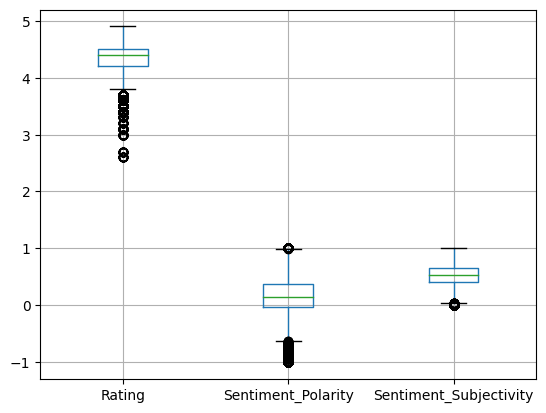

In [214]:
df.boxplot();

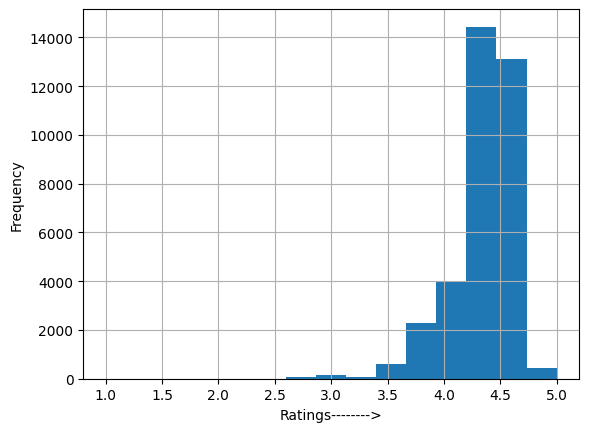

In [215]:
df['Rating'].plot(kind='hist',range=(1,5),bins=15)
plt.xlabel('Ratings-------->')
plt.grid()

In [216]:
df['Category'].value_counts().sort_values(ascending=False)

GAME                   8824
FAMILY                 3164
HEALTH_AND_FITNESS     1635
TRAVEL_AND_LOCAL       1498
PRODUCTIVITY           1465
SPORTS                 1405
FINANCE                1395
PHOTOGRAPHY            1329
TOOLS                  1314
DATING                 1200
COMMUNICATION          1094
MEDICAL                1074
PERSONALIZATION         971
SHOPPING                862
SOCIAL                  860
NEWS_AND_MAGAZINES      790
LIFESTYLE               757
ENTERTAINMENT           757
EDUCATION               642
BUSINESS                591
FOOD_AND_DRINK          578
BOOKS_AND_REFERENCE     565
HOUSE_AND_HOME          392
LIBRARIES_AND_DEMO      285
ART_AND_DESIGN          280
VIDEO_PLAYERS           275
AUTO_AND_VEHICLES       230
PARENTING               201
BEAUTY                  184
WEATHER                 180
MAPS_AND_NAVIGATION     155
EVENTS                  126
COMICS                   59
Name: Category, dtype: int64

Text(0, 0.5, 'App Category-------->')

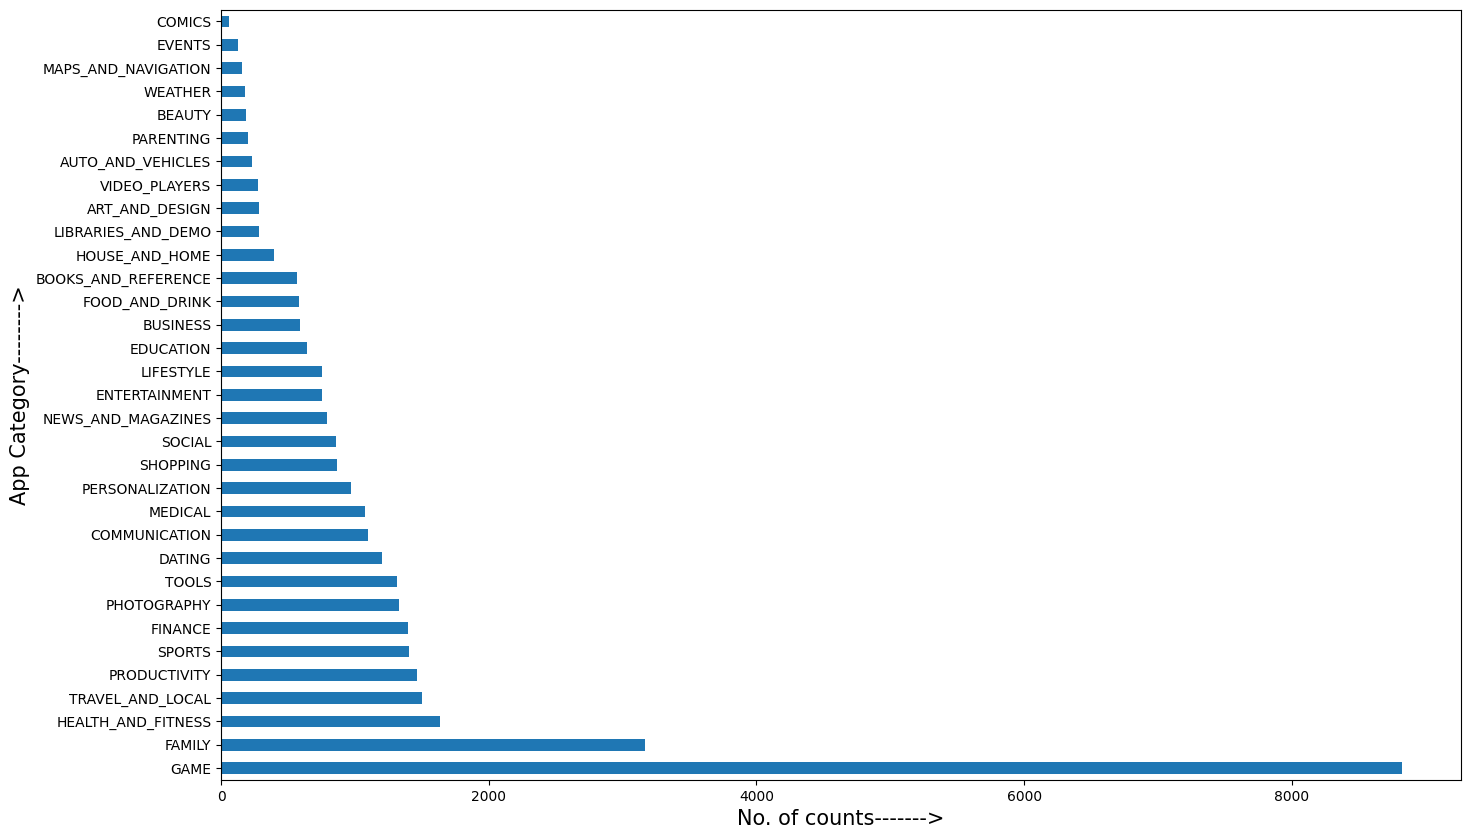

In [217]:
# Plotting the number of each category
plt.figure(figsize=(16,10))
df['Category'].value_counts().plot(kind='barh');
plt.xlabel('No. of counts------->',fontsize=15)
plt.ylabel('App Category-------->',fontsize=15)

# Data Manipulation

In [218]:
# Converting Last Updated columns into datetime format
df['Last Updated']=pd.to_datetime(df['Last Updated'],format='%B %d, %Y')

In [219]:
# Converting the data type of reviews from object type to int type
df['Reviews']=df['Reviews'].apply(lambda x:int(x))
df['Reviews']

0           967
1           967
2           967
3           967
4           967
          ...  
35132    223941
35133    223941
35134    223941
35135    223941
35136    223941
Name: Reviews, Length: 35137, dtype: int64

In [225]:
# Converting the data type of size from object to int
print(df['Size'])
print()
# Checking the number of rows with size having values 'Values with Device'
len(df[df['Size']=="Varies with device"])

22977    Varies with device
22987    Varies with device
23001    Varies with device
23000    Varies with device
22999    Varies with device
                ...        
22770                  2.0M
22769                  2.0M
22768                  2.0M
22767                  2.0M
22788                  2.0M
Name: Size, Length: 35137, dtype: object



12148

In [230]:
# replace 'Varies with device' with 'nan' value
df["Size"].replace('Varies with device',np.nan,inplace=True)
df['Size']
len(df[df['Size']==np.nan])
len(df[df['Size']=="Varies with device"])

0

In [232]:
# Converting size which ends with K and M
def convert_size(size):
  if size is not np.nan:
    if 'K' in size:
      return float(size.replace('k',''))*1000
    if 'M' in size:
      return float(size.replace('M',''))*1000000

# apply convert size
df['Size']=df["Size"].apply(convert_size)

In [234]:
# set NaN value to mean
df['Size'].fillna(df['Size'].mean(),inplace=True)
len(df[df['Size']==np.nan])

 

0

In [236]:
# Find out 20 most review app
df.sort_values(by=['Size'],ascending=False,inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10052,Chakra Cleansing,LIBRARIES_AND_DEMO,4.6,539,99000000.0,"50,000+",Free,0,Everyone,Libraries & Demo,2018-08-02,7.0,4.0.3 and up,Positive,0.250000,0.500000
18146,Hero Hunters,GAME,4.4,70747,99000000.0,"5,000,000+",Free,0,Teen,Action,2018-07-31,1.7,4.4 and up,Positive,0.062121,0.583333
10040,Chakra Cleansing,LIBRARIES_AND_DEMO,4.6,539,99000000.0,"50,000+",Free,0,Everyone,Libraries & Demo,2018-08-02,7.0,4.0.3 and up,Positive,0.750000,0.800000
10039,Chakra Cleansing,LIBRARIES_AND_DEMO,4.6,539,99000000.0,"50,000+",Free,0,Everyone,Libraries & Demo,2018-08-02,7.0,4.0.3 and up,Positive,0.600000,1.000000
10038,Chakra Cleansing,LIBRARIES_AND_DEMO,4.6,539,99000000.0,"50,000+",Free,0,Everyone,Libraries & Demo,2018-08-02,7.0,4.0.3 and up,Positive,0.285714,0.535714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,Homework Planner,EDUCATION,4.0,2525,1200000.0,"100,000+",Free,0,Everyone,Education,2015-01-11,15.9.4,4.0 and up,Positive,0.475000,0.575000
4892,Homework Planner,EDUCATION,4.0,2525,1200000.0,"100,000+",Free,0,Everyone,Education,2015-01-11,15.9.4,4.0 and up,Positive,0.315000,0.411429
4885,Homework Planner,EDUCATION,4.0,2525,1200000.0,"100,000+",Free,0,Everyone,Education,2015-01-11,15.9.4,4.0 and up,Positive,0.095833,0.429167
4880,Homework Planner,EDUCATION,4.0,2525,1200000.0,"100,000+",Free,0,Everyone,Education,2015-01-11,15.9.4,4.0 and up,Positive,0.422222,0.600000


## Data Visualization